About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

**Reminder:** Plagiarism is prohibited. Use of AI without mentioning how and in which parts it was used is also prohibited. If plagiarism or dishonest use of AI is revealed, the assignment is graded with 0.

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Let's work with data about students.

In [ ]:
!wget https://raw.githubusercontent.com/Majid-Sohrabi/DAM-2024/refs/heads/main/07-trees/students.csv

In [42]:
df = pd.read_csv('students.csv')

df.sample(4)

,ID,Performance Index,Previous Scores (out of 10),Sample Question Papers Practiced,Hours Studied,Hours Prepared for Exams,Hours Free time,Sleep Hours,Hours Not Sleep,Extracurricular Activities,Has a car,Sex,Height,Weight,BMI,Eye color,Nails length,Favorite Subject,Least Favorite Subject
774,775,96.0,10,7,9,4,5,6,18,No,NaN,f,1.629586,65.826884,24.788404,brown,0.002844,PE,Machine Learning
947,948,56.0,5,7,8,3,4,8,16,Yes,No,m,1.674442,77.801165,27.748914,brown,0.009577,PE,Algebra
699,700,65.0,5,6,9,4,3,9,15,Yes,No,m,1.706715,62.352190,21.405720,brown,0.005236,History,Art
599,600,37.0,3,5,9,4,3,8,16,Yes,No,f,1.674326,47.285820,16.867504,gray,0.008588,Biology,Machine Learning


We will predict their performance index.

In [43]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Task 1 (2 points)

Let's try to propose hypothesis, which features will be the most useful.

For every feature $x^j$:

*   Draw a plot of $x^j$ and target (scatter plot, if feature is numerical and boxplot if the feature is categorical)
*   Compute correlation of  $x^j$ and target if the feature is numerical.



Draw conclusions: which features seems to be the most important? Which do not seem useful? Is it logical?

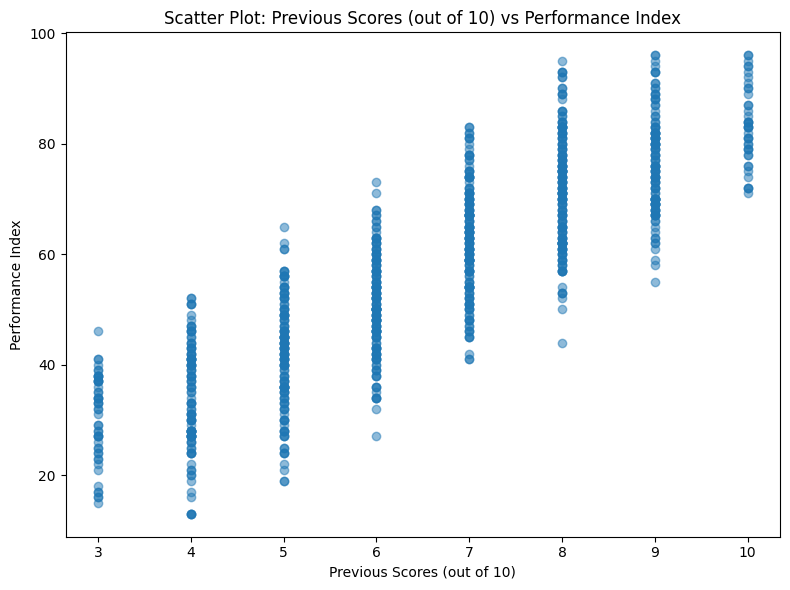

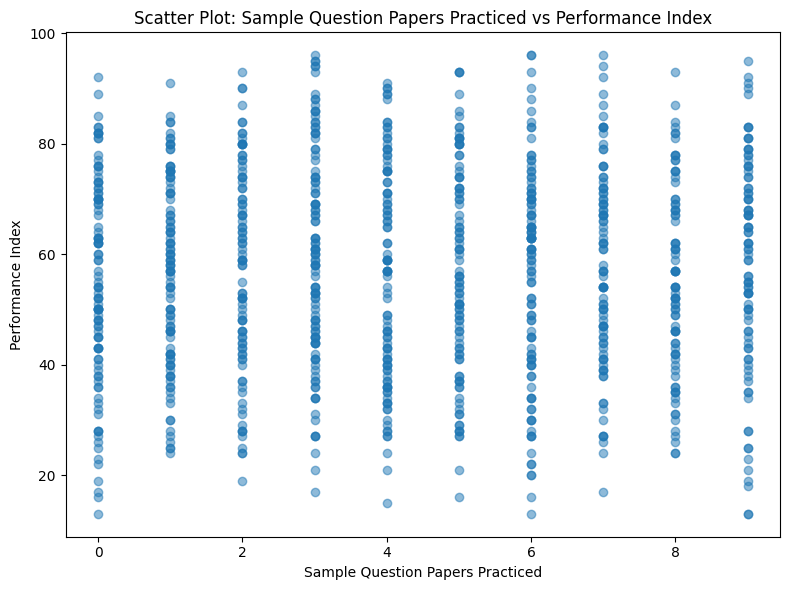

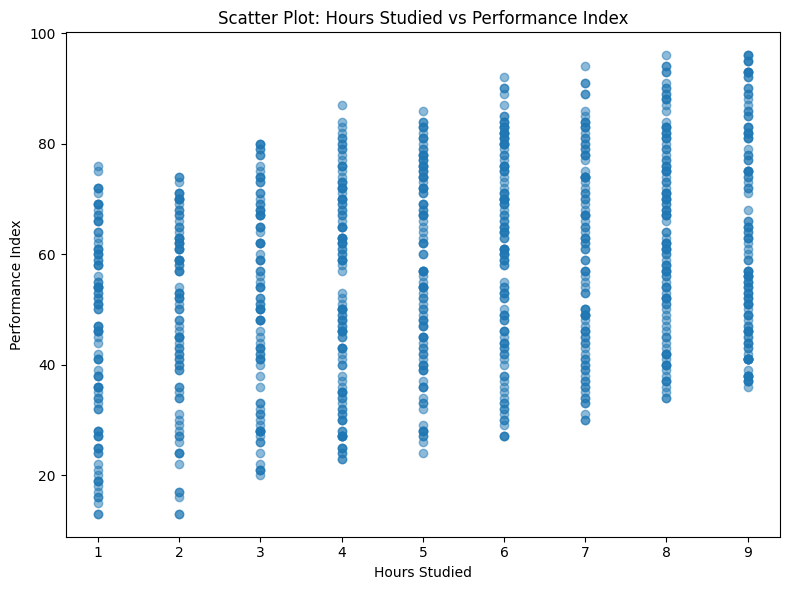

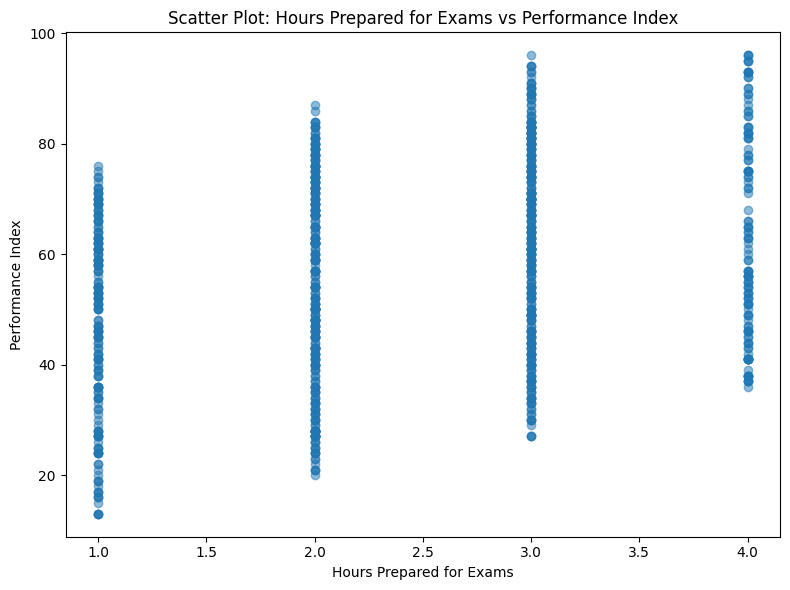

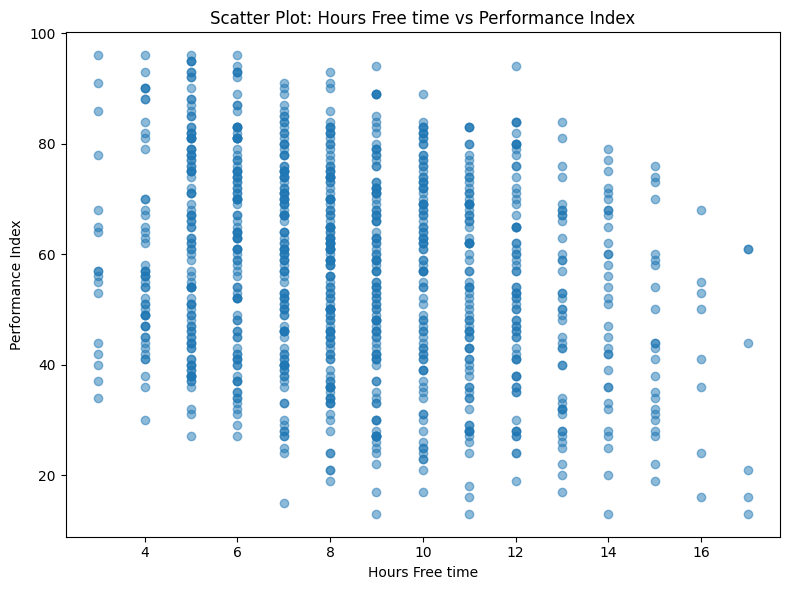

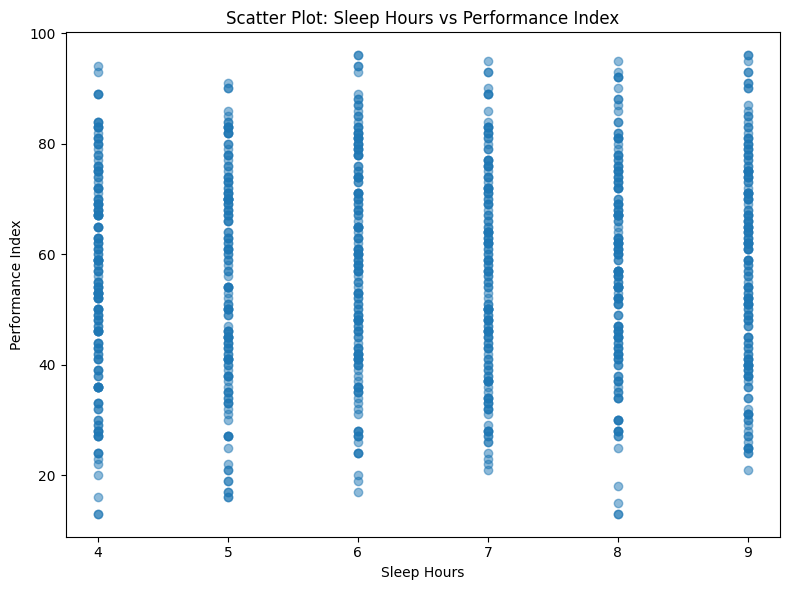

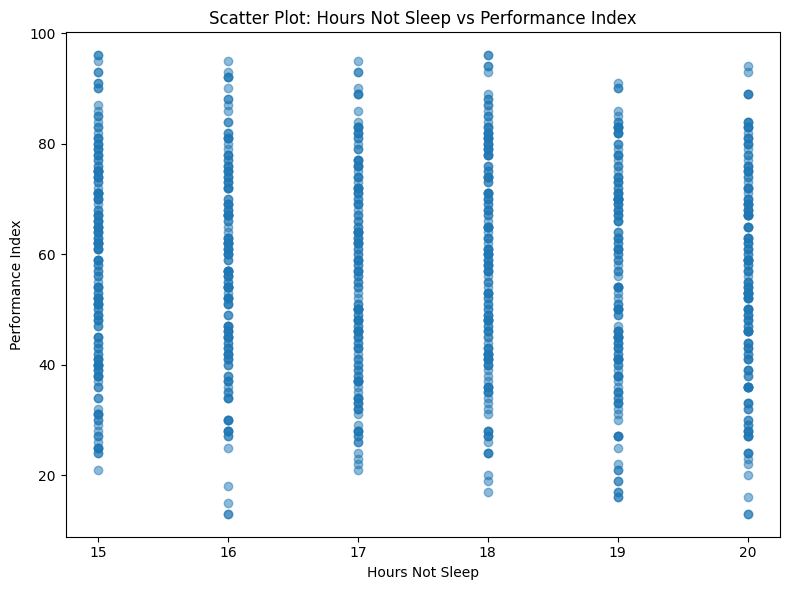

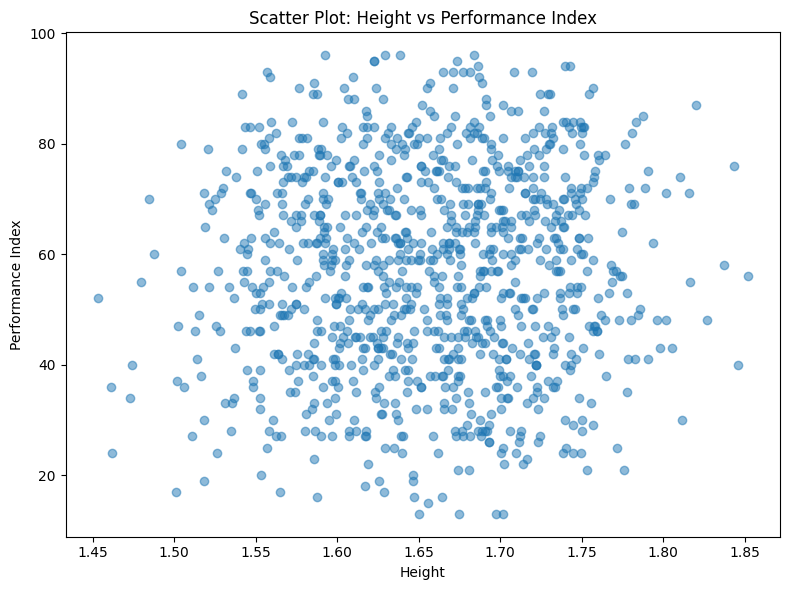

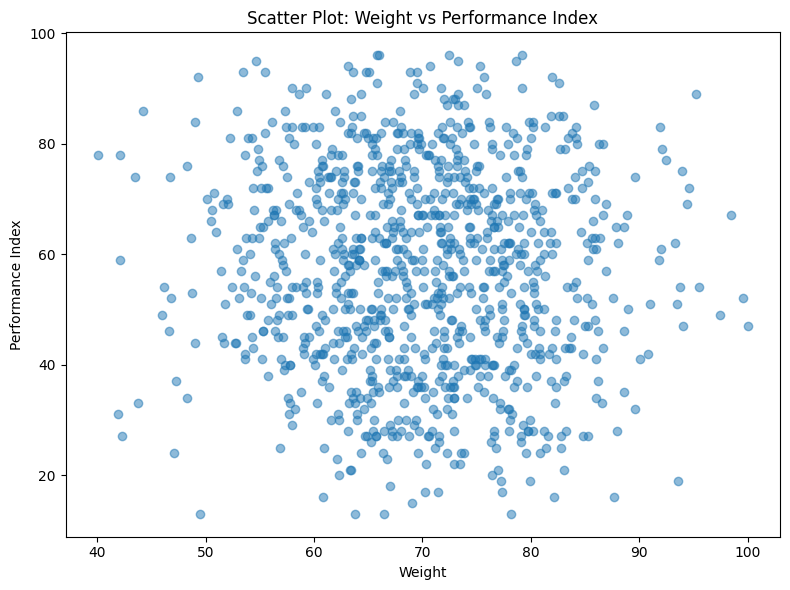

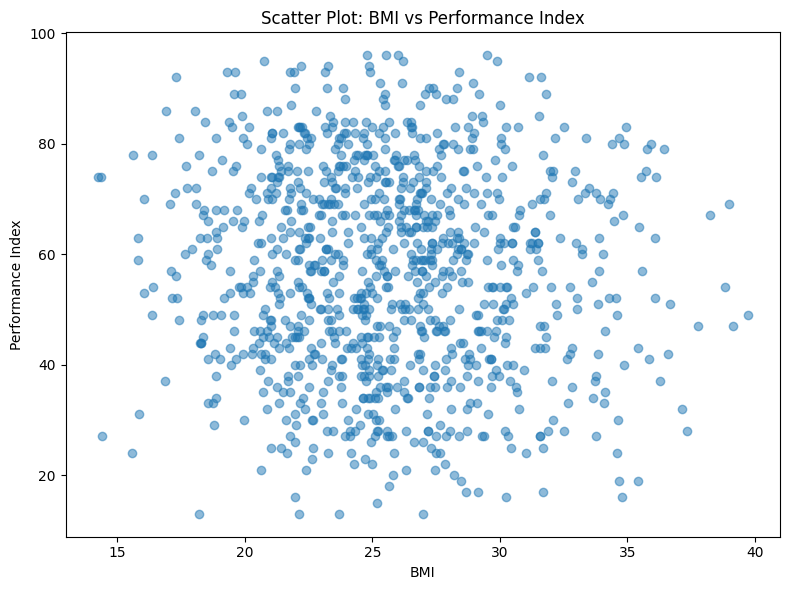

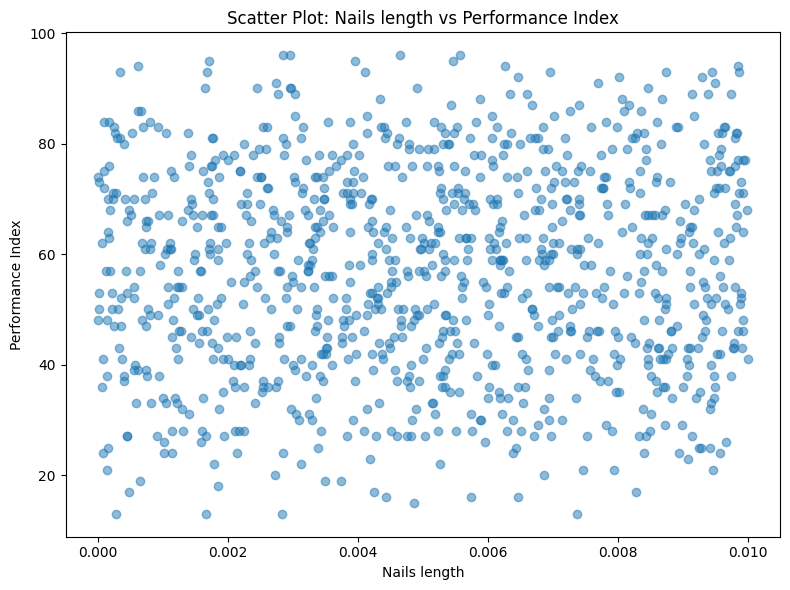

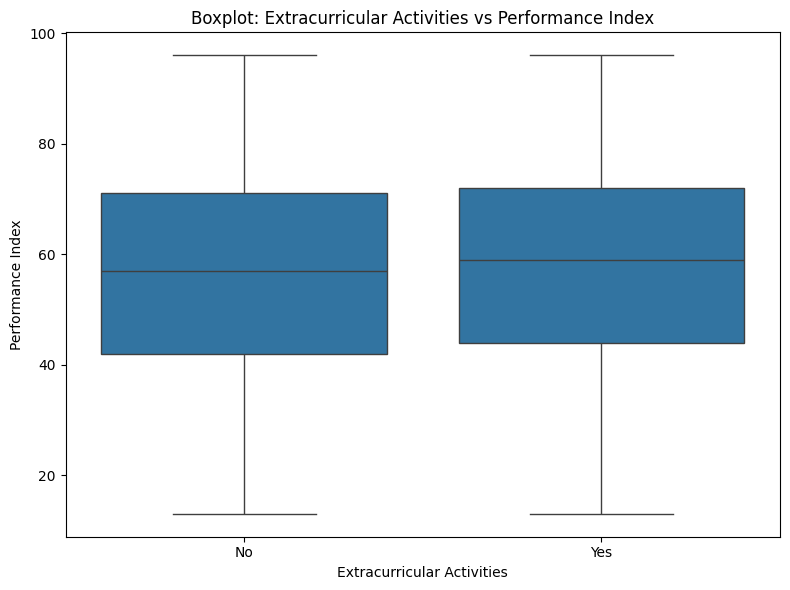

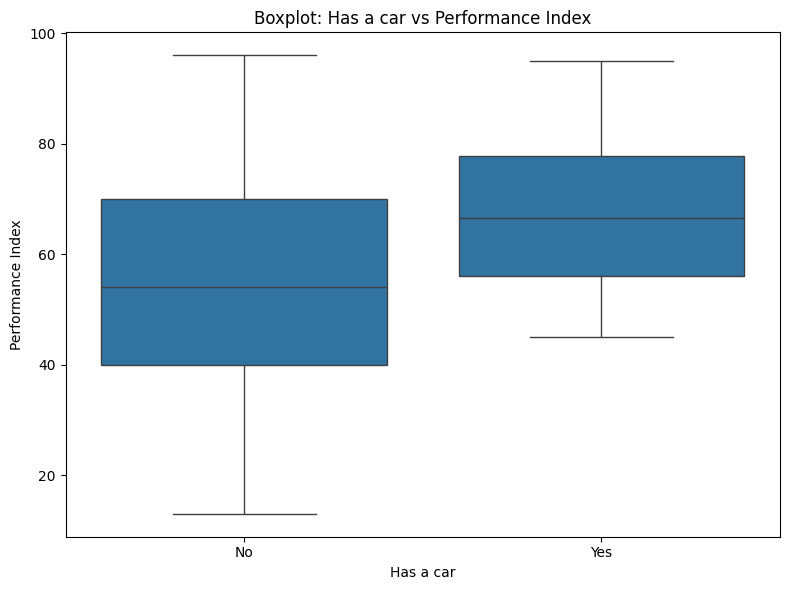

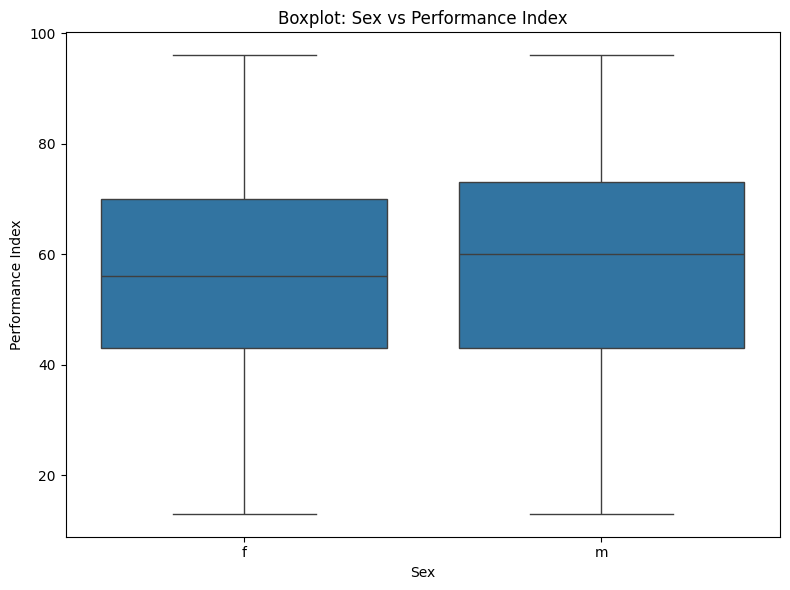

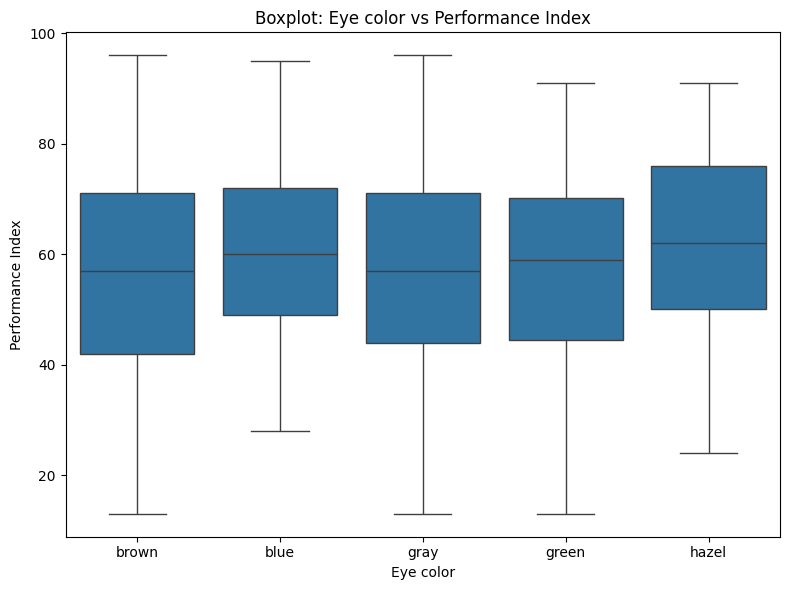

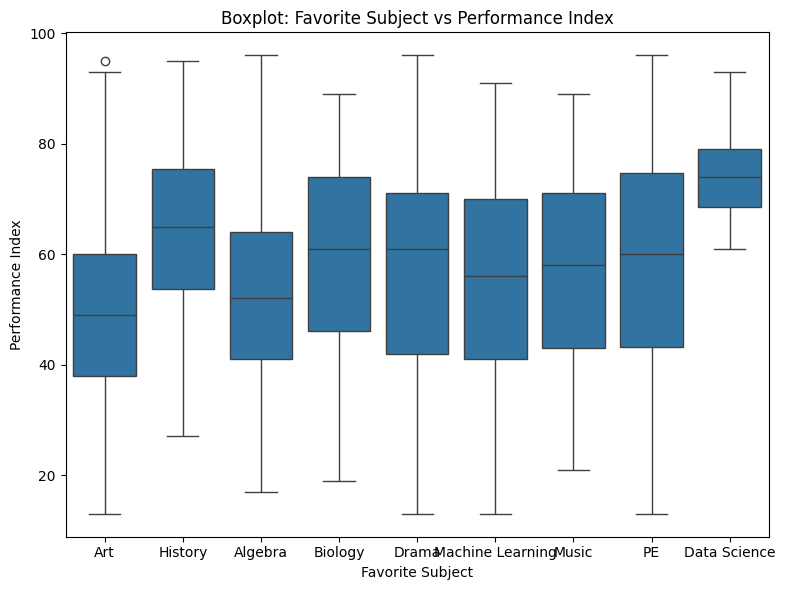

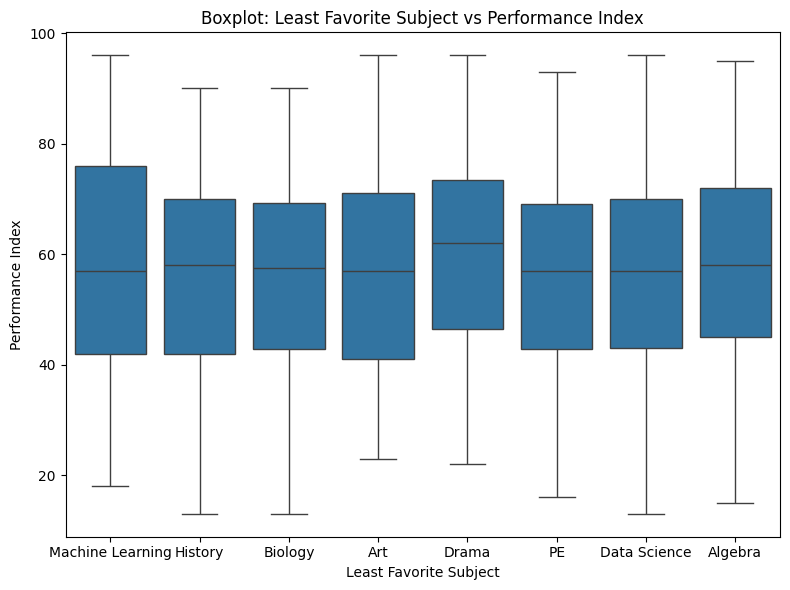

In [44]:
numerical_features = X.select_dtypes(include=[np.number]).drop(columns=['ID'], axis=1).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns
correlations = {}

def look_at_feature(feature, is_num):
    plt.figure(figsize=(8, 6))
    if is_num:
        plt.scatter(X[feature], y, alpha=0.5)
        plt.title(f'Scatter Plot: {feature} vs Performance Index')
        plt.xlabel(feature)
        plt.ylabel('Performance Index')

        correlations[feature] = X[feature].corr(y, method='pearson')
    else:
        sns.boxplot(x=X[feature], y=y)
        plt.title(f'Boxplot: {feature} vs Performance Index')
        plt.xlabel(feature)
        plt.ylabel('Performance Index')

    plt.tight_layout()


for feature in numerical_features:
    look_at_feature(feature, True)
for feature in categorical_features:
    look_at_feature(feature, False)

plt.show()

In [45]:
for feature in correlations:
    print(f"Correlation between {feature} and Performance Index: {correlations[feature]:.4f}")

Correlation between Previous Scores (out of 10) and Performance Index: 0.8602
Correlation between Sample Question Papers Practiced and Performance Index: 0.0121
Correlation between Hours Studied and Performance Index: 0.3170
Correlation between Hours Prepared for Exams and Performance Index: 0.2975
Correlation between Hours Free time and Performance Index: -0.2375
Correlation between Sleep Hours and Performance Index: 0.0508
Correlation between Hours Not Sleep and Performance Index: -0.0508
Correlation between Height and Performance Index: 0.0487
Correlation between Weight and Performance Index: -0.0411
Correlation between BMI and Performance Index: -0.0604
Correlation between Nails length and Performance Index: 0.0363


**Answer** I think, the most important features are Previous Scores, Hours Studied, Hours Prepared for Exams and Hours Free time. We can see an explicit correlation between these features and target value.
For me is interesting, why Sample Question Papers Practiced has such a little value of correlation. Maybe because of the variety of tasks (samples weren't the same with exam). Also we can see different sign of value with Sleep Hours and Hours Not Sleep. It means that in general sleep hours are important. But in absolute terms, there are both small.
If we are talking about categorical features, there is no such big difference between classes of any feature. But people with car have a bigger grade. The same situation with people who liked History and DS. But I think that it's not very important.
And of course we should remember that we see dependence only between 1 feature and target. We don't see group correlation of features and target.


# Task 2 (3 points)

Split data into train and test. Set `test_size=0.3, random_state=0`

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Preprocess the data:


*   Depict number of missing values in every column, replace missing values with median, computed on train data (numerical features) or with 'Not Given' (categorical features)
*   Encode the categorical with one-hot-encoder



In [47]:
numeric_values = X_train[numerical_features].median()
categorical_values = {feature: 'Not Given' for feature in categorical_features}

def fillNa(X_test, X_train):
    X_test.fillna(numeric_values, inplace=True)
    X_test.fillna(categorical_values, inplace=True)
    X_train.fillna(numeric_values, inplace=True)
    X_train.fillna(categorical_values, inplace=True)
    
fillNa(X_test, X_train)
X_train.sample(5)

,ID,Previous Scores (out of 10),Sample Question Papers Practiced,Hours Studied,Hours Prepared for Exams,Hours Free time,Sleep Hours,Hours Not Sleep,Extracurricular Activities,Has a car,Sex,Height,Weight,BMI,Eye color,Nails length,Favorite Subject,Least Favorite Subject
357,358,6,7,5,2,5,9,15,No,Yes,m,1.700701,80.310031,27.766039,gray,0.002912,Not Given,PE
123,124,8,2,1,1,10,9,15,Yes,No,f,1.670070,60.880860,21.827866,blue,0.004212,Art,PE
890,891,9,0,4,2,11,8,16,No,No,f,1.593076,86.884050,34.234762,Not Given,0.002206,Art,History
148,149,6,6,5,2,9,8,16,No,Not Given,m,1.656104,53.281840,19.426924,brown,0.000432,Music,Algebra
134,135,7,5,9,4,4,8,16,No,Yes,m,1.684225,68.206476,24.045040,brown,0.005258,Drama,Machine Learning


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    [('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)], 
    remainder='passthrough')
X_train = column_transformer.fit_transform(X_train, y_train).astype(np.float64)
X_test = column_transformer.transform(X_test).astype(np.float64)

Train linear regression without regularization, compute MSE on train and test data.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"MSE on train data: {mse(y_train, lr.predict(X_train))}")
print(f"MSE on test data: {mse(y_test, lr.predict(X_test))}")

print(f"Score on train data: {lr.score(X_train, y_train)}")
print(f"Score on test data: {lr.score(X_test, y_test)}")

MSE on train data: 31.80507881433723
MSE on test data: 38.84125333269376
Score on train data: 0.9086843204249864
Score on test data: 0.880083806901969


# Task 3 (3 points)

Investigate the coefficients of the model. Why are they so big/small? Can the absolute value of the coefficitnt be used as a measure of importance of the feature? Why/why not?

In [50]:
feature_names = column_transformer.get_feature_names_out()
data = pd.DataFrame({'features': feature_names, 'coeff': lr.coef_}).sort_values(by='coeff')
data

,features,coeff
11,ohe__Eye color_green,-1.207051
2,ohe__Has a car_No,-0.738997
0,ohe__Extracurricular Activities_No,-0.718498
5,ohe__Sex_f,-0.656854
21,ohe__Favorite Subject_Not Given,-0.633354
9,ohe__Eye color_brown,-0.559805
28,ohe__Least Favorite Subject_History,-0.538756
29,ohe__Least Favorite Subject_Machine Learning,-0.507390
22,ohe__Favorite Subject_PE,-0.500206
15,ohe__Favorite Subject_Biology,-0.465737


**Answer** Firstly we should remember that absolute value can not be used to measure importance of the feature because of the scale. If we want that, we should use StandartScaler. Otherwise if the feature has small values in general, to have influence on the target value, it should have big coefficient (look at remainder__Nails length coeff).
Let's scale the features

In [51]:
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
fillNa(X_test, X_train)

column_transformer = ColumnTransformer(
    [('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features),
     ('scaled', StandardScaler(), numerical_features)])
X_train = column_transformer.fit_transform(X_train, y_train).astype(np.float64)
X_test = column_transformer.transform(X_test).astype(np.float64)

lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"MSE on train data: {mse(y_train, lr.predict(X_train))}")
print(f"MSE on test data: {mse(y_test, lr.predict(X_test))}")

print(f"Score on train data: {lr.score(X_train, y_train)}")
print(f"Score on test data: {lr.score(X_test, y_test)}")

feature_names = column_transformer.get_feature_names_out()
data = pd.DataFrame({'features': feature_names, 'coeff': lr.coef_}).sort_values(by='coeff')
data

MSE on train data: 31.822596840189025
MSE on test data: 38.83838405009012
Score on train data: 0.9086340243560846
Score on test data: 0.8800926653557322


,features,coeff
40,scaled__Weight,-2.937940
11,ohe__Eye color_green,-1.215739
2,ohe__Has a car_No,-0.752335
0,ohe__Extracurricular Activities_No,-0.715632
5,ohe__Sex_f,-0.655155
21,ohe__Favorite Subject_Not Given,-0.647047
28,ohe__Least Favorite Subject_History,-0.546949
9,ohe__Eye color_brown,-0.543684
29,ohe__Least Favorite Subject_Machine Learning,-0.488008
22,ohe__Favorite Subject_PE,-0.480112


Draw conclusions about the model and important features and explain if it is logical. If it cannot be done right now, tackle the problem.

**Answer** We can see that most of the coeff are not big in absolute value except 7 of them: scaled__Previous Scores (out of 10), scaled__Hours Studied, scaled__BMI, ohe__Eye color_blue, ohe__Favorite Subject_Data Science, ohe__Eye color_green, scaled__Weight. It's obvious about first two, but other seems to be strange haha.
So, approximately we can say that the main features are Previous Scores and Hours Studied what is logical

# Task 3 (3 points)

For different `alpha` hyperparameter fit linear regression with $L_1$ regularization (`Lasso` model, if there are warnings - set `tol=0.1`).

Choose the grid in such way that the smallest alpha will result in 0-5 zero coefficent and for biggest - all coefficient will be 0.

For every model save number of zero coefficients and MSE on train and test data

In [52]:
from sklearn.linear_model import Lasso

alphas = np.logspace(-5, 2, 20)
results = {"alpha": [], "num_zero_coefs": [], "mse_train": [], "mse_test": []}
for alpha in alphas:
    model = Lasso(alpha=alpha, tol=0.1)
    model.fit(X_train, y_train)
    coefs = model.coef_
    num_zero_coefs = np.sum(coefs == 0)
    mse_train = mse(y_train, model.predict(X_train))
    mse_test = mse(y_test, model.predict(X_test))
    
    results["alpha"].append(alpha)
    results["num_zero_coefs"].append(num_zero_coefs)
    results["mse_train"].append(mse_train)
    results["mse_test"].append(mse_test)
print(results["alpha"])
print(results['num_zero_coefs'])
print(results["mse_train"])
print(results["mse_test"])

[np.float64(1e-05), np.float64(2.3357214690901213e-05), np.float64(5.4555947811685143e-05), np.float64(0.00012742749857031334), np.float64(0.00029763514416313193), np.float64(0.0006951927961775605), np.float64(0.001623776739188721), np.float64(0.00379269019073225), np.float64(0.008858667904100823), np.float64(0.02069138081114788), np.float64(0.04832930238571752), np.float64(0.11288378916846883), np.float64(0.26366508987303555), np.float64(0.6158482110660255), np.float64(1.438449888287663), np.float64(3.359818286283781), np.float64(7.847599703514607), np.float64(18.32980710832434), np.float64(42.81332398719387), np.float64(100.0)]
[np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(1), np.int64(3), np.int64(9), np.int64(15), np.int64(21), np.int64(28), np.int64(34), np.int64(40), np.int64(41), np.int64(41), np.int64(42), np.int64(43), np.int64(43), np.int64(43)]
[31.922783534855892, 31.922762432635157, 31.922713567857063, 31.922601747237703, 31.922353

Draw 2 plots near each other: number of zero coefficients and  MSE (both train and test on one plot).  Draw conclusions: compare the MSE of Lasso and initial linear regression, investigate the importance of features in the new model (which are non-zero?).

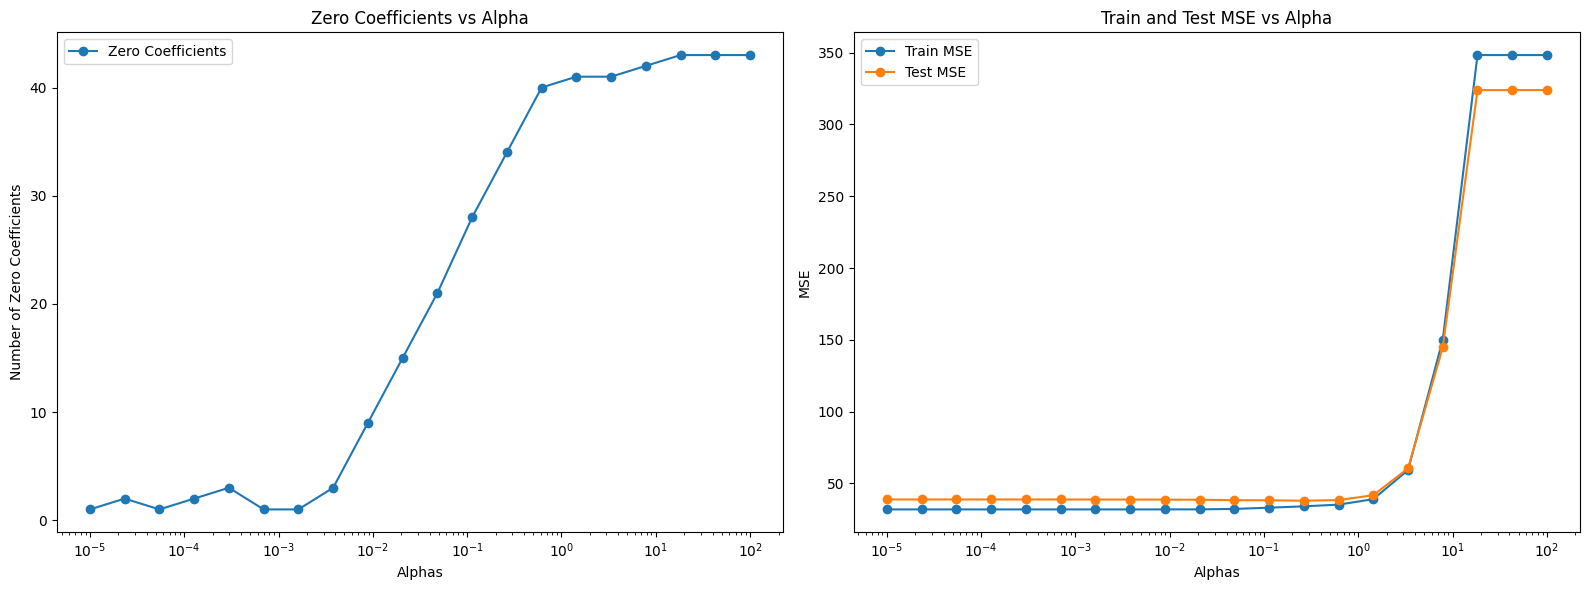

Best for train: alpha = 0.00379269019073225, num_zeroes = 3, MSE = 31.920679012119603
Best for test: alpha = 0.26366508987303555, num_zeroes = 34, MSE = 37.96248293756178


In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(results["alpha"], results["num_zero_coefs"], marker="o", label="Zero Coefficients")
axes[0].set_xscale("log")
axes[0].set_xlabel("Alphas")
axes[0].set_ylabel("Number of Zero Coefficients")
axes[0].set_title("Zero Coefficients vs Alpha")
axes[0].legend()

axes[1].plot(results["alpha"], results["mse_train"], marker="o", label="Train MSE")
axes[1].plot(results["alpha"], results["mse_test"], marker="o", label="Test MSE")
axes[1].set_xscale("log")
axes[1].set_xlabel("Alphas")
axes[1].set_ylabel("MSE")
axes[1].set_title("Train and Test MSE vs Alpha")
axes[1].legend()

plt.tight_layout()
plt.show()

min_train_mse = min(results["mse_train"])
min_test_mse = min(results["mse_test"])
id_train = results["mse_train"].index(min_train_mse)
id_test = results["mse_test"].index(min_test_mse)
print(f"Best for train: alpha = {results["alpha"][id_train]}, num_zeroes = {results["num_zero_coefs"][id_train]}, MSE = {min_train_mse}")
print(f"Best for test: alpha = {results["alpha"][id_test]}, num_zeroes = {results["num_zero_coefs"][id_test]}, MSE = {min_test_mse}")

In [54]:
model = Lasso(alpha=0.26366508987303555, tol=0.1)
model.fit(X_train, y_train)
feature_names = column_transformer.get_feature_names_out()
dec_notation = [float('%.5f' % model.coef_[i]) for i in range(len(model.coef_))]
data = pd.DataFrame({'features': feature_names, 'coeff': dec_notation}).sort_values(by='coeff')
data

,features,coeff
0,ohe__Extracurricular Activities_No,-0.40706
36,scaled__Hours Free time,-0.28918
40,scaled__Weight,-0.09870
39,scaled__Height,-0.05672
41,scaled__BMI,-0.00000
22,ohe__Favorite Subject_PE,-0.00000
23,ohe__Least Favorite Subject_Algebra,0.00000
24,ohe__Least Favorite Subject_Art,-0.00000
25,ohe__Least Favorite Subject_Biology,-0.00000
26,ohe__Least Favorite Subject_Data Science,0.00000


In [55]:
model = Lasso(alpha=0.00379269019073225, tol=0.1)
model.fit(X_train, y_train)
feature_names = column_transformer.get_feature_names_out()
dec_notation = [float('%.5f' % model.coef_[i]) for i in range(len(model.coef_))]
data = pd.DataFrame({'features': feature_names, 'coeff': dec_notation}).sort_values(by='coeff')
data

,features,coeff
0,ohe__Extracurricular Activities_No,-1.38069
5,ohe__Sex_f,-1.36546
2,ohe__Has a car_No,-1.24221
11,ohe__Eye color_green,-0.85870
39,scaled__Height,-0.75417
40,scaled__Weight,-0.50518
28,ohe__Least Favorite Subject_History,-0.46826
29,ohe__Least Favorite Subject_Machine Learning,-0.43211
21,ohe__Favorite Subject_Not Given,-0.42433
36,scaled__Hours Free time,-0.25436


**Answer** We can notice that MSE changed a little. And, if we take mse_train smallest alpha, coeffs are almost the same. But, if we are looking on mse_test smallest alpha 0.264, most of the coeffs will be about 0, except two leading Hours Studied and Previous Scores (out of 10).

# Task 4 (2 points)

Now, use $L_2$ regularization. Tune hyperparameters of `Ridge` model  using cross-validation. Report the best MSE on test data.  

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha' : np.logspace(-12, 10, 50)}
ridge = Ridge()
grid_search = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_ridge_model = grid_search.best_estimator_
y_test_pred = best_ridge_model.predict(X_test)
test_mse = mse(y_test, y_test_pred)
print(f"Best alpha: {best_alpha}")
print(f"Test MSE: {test_mse}")

Best alpha: 10.481131341546874
Test MSE: 38.91831644186716


Investigate coefficients: how many zeros? Which features are important?

In [57]:
feature_names = column_transformer.get_feature_names_out()
dec_notation = [float('%.5f' % best_ridge_model.coef_[i]) for i in range(len(best_ridge_model.coef_))]
data = pd.DataFrame({'features': feature_names, 'coeff': dec_notation}).sort_values(by='coeff')
data

,features,coeff
11,ohe__Eye color_green,-0.99525
40,scaled__Weight,-0.85649
2,ohe__Has a car_No,-0.82957
0,ohe__Extracurricular Activities_No,-0.69885
5,ohe__Sex_f,-0.62377
21,ohe__Favorite Subject_Not Given,-0.54674
9,ohe__Eye color_brown,-0.48895
29,ohe__Least Favorite Subject_Machine Learning,-0.47708
28,ohe__Least Favorite Subject_History,-0.47393
39,scaled__Height,-0.43343


**Answer** The same situation. Main feature is scaled__Previous Scores (out of 10) with coef $\approx$ 16, nex one is scaled__Hours Studied with coef $\approx$ 6 and the rest are not important. But if we compare it with first Lasso, all the coeffs are not exactly zeroes.